## Introduction

In [1]:
:ext QuasiQuotes

In [2]:
import qualified H.Prelude as H
H.initialize H.defaultConfig

## Data collection

In [13]:
[r|
matches <<- read.csv("data/sn_matches_2023.csv")
|]

0x00007f4979092858

In [14]:
[rprint|matches|]

   Match Round Home_Team Away_Team Home_Score Away_Score Diff Home_Win Away_Win
1      1     1     Wales   Ireland         10         34   24        0        1
2      2     1   England  Scotland         23         29    6        0        1
3      3     1     Italy    France         24         29    5        0        1
4      4     2   Ireland    France         32         19   13        1        0
5      5     2  Scotland     Wales         35          7   28        1        0
6      6     2   England     Italy         31         14   17        1        0
7      7     3     Italy   Ireland         20         34   14        0        1
8      8     3     Wales   England         10         20   10        0        1
9      9     3    France  Scotland         32         21   11        1        0
10    10     4     Italy     Wales         17         29   12        0        1
11    11     4   England    France         10         53   43        0        1
12    12     4  Scotland   Ireland      

## Descriptive analysis

<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAeAAAAHgCAIAAADytinCAAAgAElEQVR4nO3deVwTd/4/8HcOQJQAigp4IYpnShEv8AIUqisKAmI9iojGe7HWpdZ2a0XFWlt3FVvrF3TrUUWt1nqAiCIqWusBAlqwWhUBKYcngugCIfP7I79FGgZLyJAMyev52D/CfGY+n3emn305mUxmBAzDEAAA8I9Q1wUAAAA7BDQAAE8hoAEAeAoBDQDAUwhoAACeQkADAPAUAhoAgKcQ0AAAPIWABgDgKQQ0AABPIaABAHgKAQ0AwFMIaAAAnkJAAwDwFAIaAICnENAAADyFgAYA4CkENAAATyGgAQB4yhAD+tq1awKBYMGCBTVLTE1N+/Tp00TDKRSKsWPHrlu3ron6B6jN1dVVIBAsW7aM854xk7XPEANayxiGSUhIuH79uq4LAf13//79K1euENGBAwc47xwzWfsQ0KouXLjg6uoqkUj69u27c+dOIjp+/LhAIJgyZYqNjY2Njc0333zz4YcfWllZ9ezZ85dfflFutXPnzl69ekkkEl9f32fPntXu8K233iKi/fv3K4/Z667JMMxHH31ka2vbsmXLwYMHp6amNnDQGitXruzYsaOZmZmbm1tGRoZy4fHjx52cnMzMzFxdXVNSUup7d8nJyQKBYM2aNZ6entu2bXvzewGe++GHH4hozJgxOTk5yv/ojo6OdnZ2RHTs2DGBQPDBBx8Q0YQJE1q0aPHy5UuViTdy5EihUPj48WMi+uabbwQCQVJSUk3nmMk6wBge5bwZNGjQmv8Ri8W9e/dmGObBgwctW7bs3r37119/PWLECCI6depUXFwcEdnY2HzyySfW1tZENGDAgLCwMCIaOXIkwzDKeebv779p0yZzc3M/P7/aw+Xm5hKRj4/PkydPWNc8ePAgEU2bNm3Tpk1mZmbDhg1jGOYvB62RkJBARO+99963335rbW2tfCN37941MjJycXHZuHFjp06dOnToUFVVxfruzp07R0QSiaRfv34nTpx483sBnnNycurSpYvyIPfDDz9kGGbx4sVEVFhYuGLFCiIaMWIEwzCdOnXy8PCoO/G+/vprItq/fz/DMP7+/paWlpWVlTWdYyZrn+EGtArlbNiwYQMR7du3j2GY27dvK6eLcoZ98cUXDMMsXLiQiK5evcowTM+ePZVbzZ8/n4hSU1Pz8/MDAwOJqKioqGY4uVxORFOmTKlvzbt37yYkJNy+ffvw4cPm5uZdu3Zl/jet3zBojR9//JGIvLy8Dh48ePXq1Z9//plhGOWJwoSEBIZhjh8/HhoaWlhYyPrulNN68uTJyt7e/F6Az3777Tci+sc//sEwTM+ePe3s7BiGOXbsGBEdO3Zs3Lhxjo6OZmZmhYWFRBQREVF34j148EAgEMhksurq6jZt2rz33nu1+8dM1j6xesfbemT+/Pn/93//p3wtkUiULx48eEBEAwYMIKKePXuam5vn5eUpm2xtbYnI2NiYiDp06KB8rZyyyiOLgQMH1nR+79495cGCCtY1u3TpsmnTphMnTnTs2FEgENRe/w2D1vD29p4+ffrBgwdPnz5tZGS0dOnSYcOG5efnK9+CcgVvb+83v7uhQ4e+oULW9wJ8s3//fiJ6+PDh559/bm5unpqaevXqVXd3d5FIdPXq1WvXri1fvjw0NFS5mqenp4mJicrE69Sp06BBgxITEzMyMp4+fern51ffWJjJ2oFz0H/SqVMnIkpLSyOiO3fulJaWKpe8Wbt27UxMTORyOcMwL168KCoqcnFxUVmHYZj61ty+ffuJEyeSk5Pz8/MtLS3VrfnJkyfLli17+PDhgQMHevXqtXbt2j/++MPGxoaIlIdUp06dWrp06cOHD9/w7kQiUcPfC/CTMnn37NmzfPly5cfEAwcOmJubDxo06MiRI0VFRX5+fu3bt9+2bZtEIhk0aBDrxAsICMjLy4uKijIxMRkzZkzdUTCTtQkB/SeBgYGmpqYrVqyIioqaO3cuEU2fPr0hW1VUVCiPTd5++21XV1eFQlHTKhQKW7ZsefPmzaysLNY1i4qKiOjEiRPz5s3Lzc2tqqpSq+adO3e+9dZby5cvf/XqlbGxcYsWLczNzQMCAkQi0cqVKzdv3jx79uwffvjBysqqIe/uze8FeCsjI+P27duLFy+u+XRsZ2d38OBBhmE8PT0zMzNtbW07duzYv3//mzdvuru7i8Vi1okXEBBARDt27PD09Kz5ZKmEmawDOjitomvKg4v58+fXLDEzM6s5HXbmzJlBgwa1atWqV69e3333HfO/k2g7d+5kGEb5JXh+fj7DMG+99VbNVhs3buzatauZmdmYMWN+//13lRFXrFjRunXrpUuXsq55584dJycnS0vLWbNmubu7E9H169cbMqjSy5cvZ8+ebW1tbWJi0rdv3yNHjiiXHzp0SCqVtmzZcsiQIenp6fW9O+WZu82bN9d0+Ob3AvykvPD51KlTNUvmzZtHRJcuXTpz5gwR+fr6Mgzzz3/+k4g2btzI1DPxGIZRXq0RHR1ddxTMZC0TMAyj5X8SAIDPQkNDt2zZUlBQoDy9ADqEUxwA8FpcXFx8fPywYcOQznyAI2gAeK1Vq1YdO3b87rvvlNcXg24hoAEAeAqnOAAAeAoBDQDAUwhoAACeQkADAPAUAhoAgKcQ0AAAPIWABgDgKQQ0AABPIaABAHgKAQ0AwFMIaAAAnkJAAwDwFAIaAICnmjagcas8AIBG4z6gc3JyZDKZg4NDt27d7O3tHRwcZDJZQUEB5wMBAOg37u8H7ebmFhYWNm7cOLFYTERyuTwxMTEyMvLkyZPcDgQ6lJ6enpKSwtrk4OAwatQoLdcDeu/y5cs3btxgbZJKpcOGDdNyPdrBfUA7OzunpaUJBILaC0eNGqV8ciXoh7lz527b1oWofd2mESP2nD9/XvslgX6bNGnSjz8OITKr01IxbtxJ5aNp9Y+Y8x59fHzc3d0DAgJsbW2JqLi4ODY21tPTk/OBQNcmE/Wou1Qk2qf9UrSDYRiVIw/QrmCitnUWlhPp7adz7gN69erVWVlZiYmJygekW1tbR0ZGSqVS1pVfvHhx+/bt2ktevnzp4OCgDHcAncvJyYmIiEhOTlYoFAqFQiwWu7u7R0REdOjQQdelgf7jPqCJSCqV1iRydnZ2t27d6luzqKjo4MGDtZdkZmYOHTr0n//8Z1MUBqCu4ODgsLCw6Ojo2t+pzJw5E9+pgBZwH9BlZWVPnz6t+TMwMPDw4cNEZGdnV3dlBweHdevW1V6ya9cuhULBeVUAjVNWVubr61tzZkMsFo8dO3b9+vW6rQoMBPcBnZyc7O/v7+joaGFhQUT37t0LCQkhorNnz3I+FkBTw3cqoEPcB/T48eN//vnn5cuXr1ixYsSIEUOGDEE0Q/Ol1ncqCoXi+fPntZdUV1ebm5sbGxtrpVjQN01yDtrFxeXw4cNLliw5fvx4RUVFUwwBoDW1v1N58eKFmVndK73+v8zMzDVr1tRekpeXN27cuM8++6xpSwQ91SQBTURmZmbbtm07dOjQtWvXmmgIAC0ICgras2cPESUlJQUHB4vF4pYtW+7evXvgwIF1V3777bcPHDhQewm+UwFNNO29OCZOnJiYmNikQwA0qYsXLypfLFy4MDY2Njc398CBA/Pnz9dtVWAgcDc7gAbp3Llz//79icjR0REHxaAdCGiANykpKRkzZoxMJissLIyPjyeiVatWde/eXdd1gUFoqnPQAPrh2bNnjx49ys3NHTdunPJKu6qqqm3btum6LjAICGiAv9CuXbt27drVfCuocp0GQNPBKQ4AAJ5CQAMA8BQCGgCApxDQAAA8hS8J/8J//vOfu3fvsjZ5enq+8847Wq4HAAwHAvovfP/99xcubGRrufvyZSwCGgCaDgL6L4hEIqIBbC3GRBe1XQ0AGBKcgwYA4CkENAAATyGgAQB4CgENAMBT
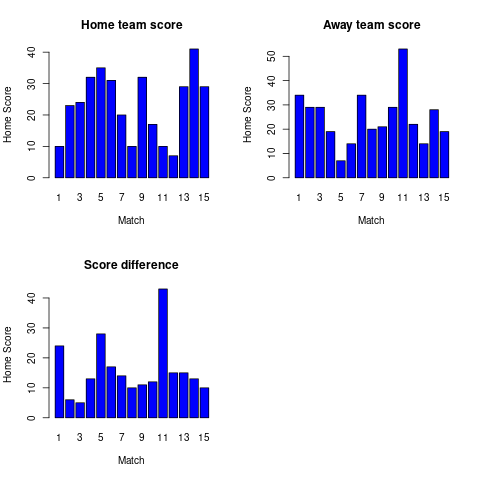

In [ ]:
[rgraph|
par(mfrow=c(2,2))
barplot(matches$Home_Score, names=matches$Match, xlab="Match", ylab="Home Score", main="Home team score", col="blue")
barplot(matches$Away_Score, names=matches$Match, xlab="Match", ylab="Home Score", main="Away team score", col="blue")
barplot(matches$Diff, names=matches$Match, xlab="Match", ylab="Home Score", main="Score difference", col="blue")
par(mfrow=c(1,1))
|]

<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAeAAAAHgCAIAAADytinCAAAgAElEQVR4nO3deUBUVf8G8GeAAZRNVERUdgTFDUVREHNHzT0117ef++uSpZlmLy6pRdpbZplbpWVqZWUF5r6gqKSCggiIqAhuoImAoMM68/tjilcRWWfuvTPzfP4aLnPP+V7Ux8Odc86VqVQqEBGR9BiJXQAREZWPAU1EJFEMaCIiiWJAExFJFAOaiEiiGNBERBLFgCYikigGNBGRRDGgiYgkigFNRCRRDGgiIoliQBMRSRQDmohIohjQREQSxYAmIpIoBjQRkUQxoImIJIoBTUQkUQxoIiKJYkATEUkUA5qISKIY0EREEsWAJiKSKAY06RIHBwfZP6ysrDp06PD+++8XFxdrvKPHjx/LZLI6deqov8zOzs7MzNRGR0QVMBG7AKJqc3d3t7KyevjwYUxMTExMTGJi4vfff6/ZLoyMjHx8fExNTdVf9uzZMzY2Njo62tfXV7MdEVWAI2jSPZs3b46JiUlLSztw4IBcLv/xxx/j4uI020WdOnViYmLOnj2r2WaJqoUBTTqsX79+Q4cOValUP/74o/pIamrqsGHD7Ozs7O3tJ06cmJOTA+DevXsymczOzu73339v3bq1tbX1kCFD7t+/rz4lMjKye/fu1tbWjRo1Gjp0aEJCAp69xdG+ffvY2FgAHTt23L179+DBg2Uy2cqVK9Wnr1q1SiaTzZs3T/jLJ73HgCbd1rlzZwApKSkAcnNz/f399+3b161bN09Pz23bto0dO1apVKrfmZ2dPWbMGLlcrlAo9uzZExwcDODBgwcDBgw4depUnz59WrduHRYWFhQUlJ+f/3QXq1atcnZ2BvDBBx907tx5/PjxAP744w/1d/fv3w9gzJgxwl0zGQ4Vke5o3LgxgCNHjpQe2bJlC4Bu3bqpVKo1a9YAmDNnjvpbAQEBAPbs2ZORkaH+23769GmVSrV9+3YAbdu2ValUx48fB+Du7n7jxg2VSrVy5coZM2bcvHkzLy8PgLm5ubopHx8fANHR0SqV6vHjx5aWljKZLD09PTs728TExMXFRdCfAhkMjqBJt2VlZQFo0qQJAPWd6HXr1qmneURGRgJQ37IAYGtrq47sjh07Anjy5AkAPz8/Ozu769evu7q6ent7Z2Zmvv32246OjhX0WLdu3eHDh6tUqn379h05cqS4uJjDZ9ISzuIg3RYVFQXA1dUVgImJCYDZs2d369at9A1eXl7qF8bGxuoXMpms9Lt16tRJSkr6+eefw8LCjh07tnbt2o0bN0ZHR6sbfJFx48Zt3759z549DRo0AO9vkNZwBE067NixY7/99ptMJlNHZKtWrQBYWFiMHj169OjROTk50dHRT8fx8w4cOPDf//7X2dl57969Dx486Nu3b0FBQURERLlvLp0H3bdv30aNGh0+fHjfvn1eXl7t2rXT9JURAeA9aNIp6nvQnp6eHTt2dHNzU/8dHjt2rPq7OTk5dnZ2RkZG48ePHzJkCAB3d/e8vDz1PeiGDRuq35aUlATAw8NDpVLt27cPgKWl5fDhw0eNGlWnTh25XH7p0qUy96CHDh0K4OWXX46Li1MfmTNnjrr39957T/AfAxkKBjTpEnVAq1lYWLRr12758uVFRUWlb0hOTh4wYICtra29vf1rr712584dlUpVQUCrVKrt27d37NjRxsbG0tLSz89v7969KpWqTEAfP37c19fX0tJy//796iNnzpxRl3H58mXBLp8MjUylUgkyUifSK7dv33Z0dPTx8YmJiRG7FtJbvAdNVG1fffXVsGHDAEycOFHsWkifcQRNVG09e/ZMTEzs3bv3119/XbduXbHLIb3FgCYikije4iAikigGNBGRRDGgiYgkigFNRCRRDGgiIoliQBMRSRQDmohIohjQREQSxYAmIpIoBjQRkUQxoImIJIoBTUQkUQxoIiKJYkATEUkUA5qISKIY0EREEsWAJiKSKAY0EZFEMaCJiCTKROwCqufBgwfh4eFiV0FE9DcjI6MhQ4bI5XJtNK5jAX3s2LHQ0NDu3buLXQgREQB89913Pj4+7u7u2mhcxwIaQNeuXadPny52FUREAHDu3DntNc570EREEsWAJiKSKAY0EZFEMaCJiCSKAU1EJFEMaCIiiWJAExFJFAOaiEiiGNBERBLFgCYikihxAjozM1OUfumFYmIwdiz8/PDWW8jJEbsaIgKECej79+9PnjzZz89v0aJFDx486NChQ6NGjby8vJKSkgTonSr3++/w98fRo7C1xbp1CAzEX3+JXRMRCRLQU6dOzc3NfeeddxITE729vUePHp2dnT1+/Pg5c+YI0DtVIjkZ48ejQwdcuYKDB3H4MFJSMHo0lEqxKyMydELsZnfixImbN2/a2Nj4+fl5enrOmzfP1NR0/vz5a9euFaB3qsSMGTA3x+7dsLUFgB49sG4dpkzBN99gyhSxiyMyaEKMoO3t7U+ePAngxIkT+fn5KSkpAJKTk23ViUAi2rMH4eF4/304OPzv4KRJCAzEsmUoKBCvMiISZAT90UcfvfrqqzY2NiqVav369X369AkKCvrjjz/ee+89AXqnirz/Pjw8MG3aMwdlMixfjt69sX07pk4VqTIiEiSghw0bduvWrWvXrrVu3drCwqJt27ZHjhzZsWNHUFCQAL3TC508iXPnsHkzTJ77a9CrFzp0wLp1DGgiEQn0RJUGDRo0aNAAQG5ubteuXQMDA4Xplyry5ZeoVw8TJpT/3VmzMHUq/vwT/v7ClkVEfxPiHrRCoQgJCfHy8jI3N7e2tjY1NfX09FyxYkVhYaEAvVP5cnOxezfGjUPduuW/YfRoWFjgu++ELYuI/keIgJ49e3ZUVNTWrVvT09OLioru37+/bdu2xMTEWbNmCdA7le/336FQvHD4DMDSEsOH4+efUVQkYFlE9D9C3OLYs2fPzZs369Spo/7S1tbW39/fz8/Pzc1NgN6pfD/9BBcXdOlS0XtGjsSOHThxAn36CFUWEf2PEAHt6Oh48ODBYcOGPX0wIiKiYcOGFZz1008/ffTRR2UOpqen+/n5cehdW7m5OHwYr78OmayitwUFwdISv/3GgCYShRABvXHjxlGjRi1dutTb29vKyiovLy8pKenBgwehoaEVnPXqq6+++uqrZQ7OmzcvPT1dm8Uahv37UVCA4cMreVudOujdG/v2CVITEZUlREB37tz5xo0b4eHhaWlpmZmZtra206ZN6969u7GxsQC9Uzn27kXDhlWanjFgAEJDcfkyWrbUfllE9AyBptkZGxv3efbX5Ozs7LNnz/br10+YAuh/lEocOIABA2BUhY+I+/cHgMOHGdBEwhNtP+jExMQyd6VJIDExuH//7+StlLMzPDxw9KiWayKicogW0AEBAQqFQqzeDdrRo5DJ0KtXVd/fuzdOnEBJiTZrIqJyCB3Qubm5KpVK4E7pGUePolUrNG5c1ff37ImcHMTEaLMmIioHVxIamOJiREaiZ89qnNK9OwBERGipIiJ6Ea4kNDDR0cjLw0svVeOUxo3h5cWAJhIeVxIamIgIyGTo1q16Z3Xtij/+0E5BRPRCQoyg1SsJyxysdCUhacWpU/Dygr199c7y98f9+7h2TTs1EVH5pLuSkDRPpcKff2LIkGqfqF7S8uef8PDQeFFE9CJcSWhIrlzBgwfo2rXaJ7ZsCSsrnDuHf/1LC2URUflEW0lIIvjzTwAICKj2iUZG8PVFVJTGKyKiCoi2UIVEcPYs6tWDp2dNzu3UCbGx4MxIIgExoA3J2bPw86vSFhzP69QJBQVISNB0TUT0Qgxog6FQID4efn41PL1DBwC4cEGDFRFRxRjQBiM2FsXF6NSphqe7ucHWlgFNJCQGtME4fx4AfH1reLpMBh8fBjSRkBjQBiM6Gg4OaNq05i20b4+4OG5rRyQYBrTBOH/+7/vINdauHZ48QXKyhgoiokow
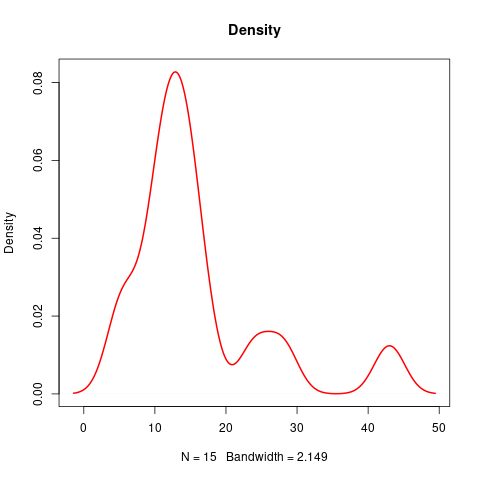

In [40]:
[rgraph|
plot(density(matches$Diff), lwd = 2, col = "red", main = "Density")
|]

<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAeAAAAHgCAIAAADytinCAAAgAElEQVR4nOzdZ1gTWRsG4CcEQgtg6KBUBVTsBbvYe8G2ig0sKAL23lABsa9dFBXFvqtr1xV7d13sBd1dFQEV6Uivyfcju34IiJRkZgLvfe0Pdpic8yYxD5OZOefwJBIJCCGEcI8S2wUQQggpHgU0IYRwFAU0IYRwFAU0IYRwFAU0IYRwFAU0IYRwFAU0IYRwFAU0IYRwFAU0IYRwFAU0IYRwFAU0IYRwFAU0IYRwFAU0IYRwFAU0IYRwFAW0gjExMeH9R0tLq0mTJn5+fnl5eQDS09N5PJ66unrJLSQnJyckJEgfUlTBRv766y8ej2djY1PWIgt2UcqqZCI0NNTGxkZFRWXHjh2FflXwdVNSUrKwsPDy8kpJSSmhtdJXXvJLWqzSv4+FntThw4eNjIxUVFRCQ0NL3x1RUMpsF0DKo2bNmlpaWomJiY8fP378+HFYWNihQ4eUlJQaNWokEAhKfmzHjh2fPHny4MGDpk2bFv1tKRspfRcyabCU1q9f/+bNG0dHx3r16hW7Q61atYRCYWxsbGRk5NatW1NTU4ODg7/XWukrL/klLUFp3sdCT2rJkiWxsbFDhw41NDQsU19EIUmIQjE2NgZw+fJl6f9euHBBRUWFx+M9ffq0lC00atQIwIMHD3645+vXrwHUqlWrrEWWvgvZ6tGjB4ATJ04U/ZX0dbt+/bpEIhGLxevXrwegpqaWn59f8X7L8XxL/z4WelL6+voAoqKiKl424T4KaAVT6IMtkUgGDx4MYP78+WlpadLQkW6/c+dO+/bttbS0DAwM+vXr9+LFC8l/USJ17Nixz58/A9DX1797927Tpk2PHTtWsJGvAb1mzRozMzNLS8slS5aIxWKJRPLixQsAtWvXlvZ1+/ZtAC1btizaRaGqMjIyZs+ebWtrKxQKmzVrdvDgQen2r5WcOHHC3t5eS0urb9++MTExRV+B77VQsN+lS5cW+7pJA1oikYSHh0v3TExM/F6DBSsvobxCz/d7r3z53seCjS9atKjgodXZs2elT6R///76+vqGhoYuLi7JyckFq/36tv5wz2Jf9qSkpPHjx1tYWOjo6HTp0uXRo0dfX72iTRF5oIBWMEU/2GvWrAEwdOjQgh/suLg4bW1tJSWlAQMGdOzYEYCpqWlmZuaFCxcsLCwALF++PCoqSvr5FAqFZmZmRfNUGtBKSkpqamqOjo5aWlrSBJGUGNCFuigU0NLjQTMzs969e2toaAAICAiQ/JcUysrKqqqqjRo1UlZWBjB+/Piir8D3Wrhw4ULDhg0BzJw5s2gmFgrozZs3A9DR0SmhwaIBXWx5hZ7v91758r2PBZ/Us2fPjhw5In0Xtm7d+vHjx5SUFGNjYxUVlQEDBrRt2xZAz5498/Pzi76tJe9Z7PMSi8UtW7YE0KBBg7Zt2/J4PH19/ZiYmO81VfZ/y+THKKAVTNEP9u7duwG0a9eu4Af7+vXrAGrWrBkeHi6RSHx9fd3d3SMjIyXffh+Xfj4BzJs3Lzo6Ojc3t2hAfz0wvHv3LgBNTc309PQSArpQFwUbvHXrljQKv3z5IpFITp06BcDAwKBgJXfu3JFIJPv375dGQ6GnX0ILkv+i9uTJk9973ezs7Jo1a2Zubi7ta9asWSU0WDSgv1dewedbwitfjvex6JOSnuL48OGDRCL5+eefAUyePFn6q9atWwM4c+ZM0bf1h3sWfV6XL18GYGNjk5eXJ5FIhg8frqysvHv37u81VfQ1JxVHd3EovKSkJACmpqYFNzo4OBgYGLx9+9bKyqpu3boJCQmzZs2SHk8VpaqqumjRImNjY+kBVCHq6uq9e/cG0KpVKzMzs/T09FevXpWv1KdPnwLo27evtrY2gB49emhqasbFxUVHR0t3EIlE0g98s2bNAGRkZJS1hZL99ddfDx48iIyMNDU1nTZtmq+vb5ka/GF5KOMrX1Cx72PJnj17BmDz5s3Su0Gkf0Ffvnwp/W3Bt7XkPYt9XtK/wW3btuXz+QAOHjyYm5s7duzYkpsiskV3cSg86e1WVlZWBTeqq6u/fv366NGjp0+fvnr16oYNGwICAh48eFDs7Q1aWlqamprfa19SYN136WeVx+MV/VVpSPf/+nCBQKCjo5Oenp6Xlye9aUHafsF9St9CaQq4fv26o6NjuRv8YXko4ytfULHvY8mkf1A9PT3btWv3daOdnZ30h4Jva8l7Fvu8pK+Arq5umTolskVH0Irt6tWrJ06c4PF4w4YNK7j9woULa9assbCwOHfuXHx8fNeuXbOzs2/evPl1h9LftJuVlRUSEgLg4cOH79+/19DQqF27tpqaGoD3799LbyW+ceNG0QcW7UJ6OvXMmTPSb/HXr1//9OmTnp5eaQ4wZdWC/BqUPt8fvvLF+t77WDJ7e3sAmpqaQ4cOHTp06JcvXx48eFDsH4/S7/lV3bp1AVy+fFn6vFxcXLS0tA4cOFCOpkj5sXqChZSZ9Nylra1ts2bNrK2tpW+is7Oz5NtzpufPnwcgFAoHDBgwZMgQdXV1FRWV58+fSySS/v37A+jVq9ezZ8++XsT/2n6x56A1NDS6dOmio6MDYNGiRRKJJDc318DAAIChoWH9+vWlef31HHTBLgqdUe3atSsAKysrJycn6fHd1q1bJQVuJ5DuVsIdft9rQVKKc9BfLxKWpsFi7+IotryCz7eEV74c72PRJ1XwHPSXL18MDAyUlJRGjBjRr18/ADVr1kxLSyv6tpZyz4LPKz8/X3puvWHDhh06dODxeCYmJvHx8d9rqugLSyqOAlrBSD/YUpqamg0bNly2bFlubq6kyAd7//79zZo109HREQqFDg4O586dk26/fv1606ZNhULh77//XpqArl69uru7u5GRkbm5+ZIlS75er79y5Yq9vb1QKHR0dJReXPoa0AW7KFRVenr6jBkzbGxshEJh06ZN9+/fL91e+oD+XguS8gb09xosfUAXfL4lvPLlex9LCGiJRPL333/37NlTJBIZGRmNHj3648ePRast/Z6FnldsbOzo0aOrV6+uo6PTs2fPly9fltAUkQeepIynEQkhhDCDzkETQghHUUATQghHUUATQghHUUATQghHUUATQghHUUATQghHUUATxRAfHz9t2jRbW1t1dXVzc/MBAwY8evRI+qvs7GzpvBCrV6/+uv+oUaN4PN7ixYsLtfP333/37t1bV1fX1NR0xIgRHz58kG5PTU0dM2aMiYmJjY3NnDlz8vPzS97/1atXP/30k7Gxsamp6ZgxY+Li4uT7/EnVxPaN2IT8WE5OjoODAwBVVdUmTZpIBy5qaGhIh05kZWVJ/zHr6OjExcVJHzJy5Ej8N+7xq4yMDEtLSwAODg7Swdz16tXLzs6WSCTt27cH0KxZM+m0EmPGjClh/9jYWHNzcx6P16VLl+rVqwPo0aMH468KqfwooIkC+OOPPwDo6eklJSVJJJLMzMwuXboAmDZtmqRAQAPw8vKSPqTYgD579iyApk2bSiSS3NxcaeZeu3bt4cOH0nQWi8WpqanSRf8SExO/t790atBJkyZJJJKPHz/yeDw+n1900mdCKohOcRAFIB2RrKqqqqqqCkBNTS0gIGDv3r19+/YtuJuxsfH27dv//vvv77UTFRUlFAq7d+8OQFlZuU2bNgAiIiKuXr0KoGPHjjweTzo+Ozc39/79+9/bv169en5+fmPHjgUgFot5PJ6urq60NkJkiKYbJQrAwcFBKBR++vTJ0tKya9euzZs3b9GixahRo5SUvjnC8PX1dXNzmzt37okTJ4ptx93d3d3dXfqzWCyWTgZdq1Yt6Q/SaS4A6OnpAUhISPje/g4ODtJTLgEBAUFBQUpKShs3bqQZ3YjM0RE0UQAmJiaXLl3q0KFDYmLiwYMHp02b1qpVK0tLS+l6KF917dq1V69eJ0+eLHb604LE
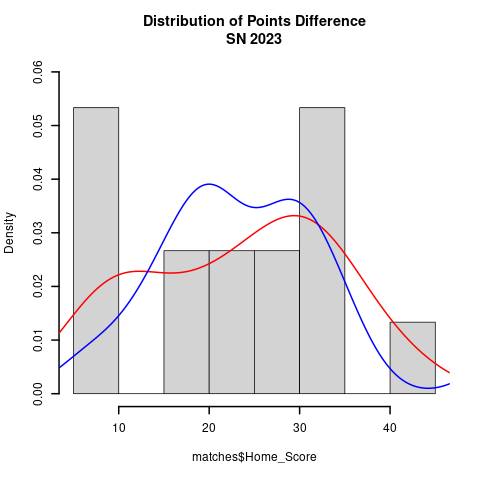

In [28]:
[rgraph|
hist(matches$Home_Score, prob = TRUE, ylim = c(0,0.06), main = "Distribution of Points Difference\nSN 2023", lwd = 2, )
lines(density(matches$Home_Score), lwd = 2, col = "red")
lines(density(matches$Away_Score), lwd = 2, col = "blue")
|]

<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAeAAAAHgCAMAAABKCk6nAAAC7lBMVEUAAAABAQECAgIDAwMEBAQGBgYHBwcICAgJCQkKCgoLCwsMDAwNDQ0ODg4PDw8QEBARERESEhITExMUFBQVFRUWFhYXFxcYGBgaGhobGxscHBwdHR0eHh4fHx8gICAhISEiIiIjIyMkJCQlJSUmJiYnJycoKCgpKSkqKiosLCwtLS0uLi4vLy8wMDAxMTEyMjIzMzM0NDQ1NTU2NjY3Nzc4ODg5OTk6Ojo7Ozs8PDw9PT0+Pj4/Pz9AQEBBQUFCQkJDQ0NERERFRUVGRkZHR0dISEhJSUlKSkpLS0tMTExNTU1OTk5PT09QUFBRUVFSUlJTU1NUVFRVVVVWVlZXV1dYWFhZWVlaWlpbW1tcXFxdXV1eXl5fX19gYGBhYWFiYmJjY2NkZGRlZWVmZmZnZ2doaGhpaWlqampra2tsbGxtbW1ubm5vb29wcHBxcXFycnJzc3N0dHR1dXV2dnZ3d3d4eHh5eXl6enp7e3t8fHx9fX1/f3+AgICBgYGCgoKEhISFhYWGhoaHh4eIiIiJiYmKioqLi4uMjIyNjY2Ojo6Pj4+QkJCRkZGSkpKTk5OUlJSVlZWWlpaXl5eYmJiZmZmampqbm5ucnJydnZ2enp6goKChoaGioqKjo6OkpKSlpaWmpqanp6eoqKipqamqqqqrq6usrKytra2urq6vr6+wsLCxsbGysrKzs7O0tLS1tbW2tra3t7e4uLi5ubm6urq7u7u8vLy9vb2+vr6/v7/AwMDBwcHCwsLDw8PExMTFxcXGxsbHx8fIyMjJycnKysrLy8vMzMzNzc3Ozs7Pz8/Q0NDR0dHS0tLT09PU1NTV1dXW1tbX19fY2NjZ2dna2trb29vc3Nzd3d3e3t7f39/g4ODh4eHi4uLj4+Pk5OTl5eXm5ubn5+fo6Ojp6enq6urr6+vs7Ozt7e3u7u7v7+/w8PDx8fHy8vLz8/P09PT19fX29vb39/f4+Pj5+fn6+vr7+/v8/Pz9/f3+/v7///+YSvqNAAAS1UlEQVR4nO3df0BUZb7H8SkJrrIuGCletLaCW8ImerdrAiH+SlxLl0jINo1AXTfN1NTMSjbdcDHjbml58ba1rflrkTL6QWgmIrpihOSvxdT8hYqAiPyagee/e+Y4LXQYvM9zzuHMw9fP648DzTnP8xznneMMM8zYGJBm8/QJQOdCYOIQmDgEJg6BiUNg4hCYOAQmDoGJQ2DiEJg4BCYOgYlDYOIQmDgEJg6BiUNg4hCYOAQmDoGJQ2DiEJg4BCYOgYlDYOIQmDgEJg6BiUNg4hCYOAQmDoGJQ2DiEJg4BCYOgYlDYOIQmDgEJg6BiUNg4hCYOAQmDoGJQ2DiEJg4BCYOgYlDYOIQmDgEJg6BiUNg4hCYOAQmDoGJMxD44gaQwKamzgq8ftI74HkRZZ0W+C39Y8E0yQhMGwITh8DEITBxCEwcAhOHwMTJErjxpF3/UtAxSQIvj5jywAf614IOyRH409+1MPsjB/UvBh2RI/Bz3yibTX/Wvxh0RI7AiwqUzfuZ+heDjsgRuGhcDSuPPqN/MeiIHIHZ1uHRsXv0rwUdkiQwdBYEJg6BiUNg4hCYOAQmDoGJQ2DiEJg4BCYOgYkzJXBNi5sLEVgKhgPXLQ3xtnkFpzZqdyCwFAwHTpqQX2mvLEhI1u5AYCkYDhxQp35x9NfuQGApGA4cnqV+2TZIuwOBpWA4cGG/sISUxIFBRdodCCwF4/eiHbmZaWvyHK0XFL6mGj/D4KmBGcx5HHypts1/nMpVxU3Qf1ZgGsOBx9Wzsl/ZusWWa3c8l6D/rMA0hgPbatmI2SfPzo/X7kBgKZgR2M+u/EvcW7sDgaVgPPAxNugYY4eCtTsQWAqGAz8Y5Os3lu3s/d/aHQgsBRPuRdcf2sN2Z7W7GIGl0HlPFyKwFBCYOAQmDoGJQ2DiEJg4BCYOgYlDYOIQmDgEJg6BiUNg4hCYOAQmDoGJQ2DiEJg4BCYOgYlDYOIQmDgEJg6BiUNg4hCYOAQmDoGJQ2DiEJg4BCYOgYlDYOIQmDgEJg6BiUNg4hCYOAQmDoGJQ2DiEJg4BCYOgYlDYOIQmDgEJg6BiUNg4hCYOAQmDoGJQ2DiEJg4BCYOgYkzJXBNi5sLEVgKhgPXLQ3xtnkFpzZqdyCwFAwHTpqQX2mvLEhI1u5AYCkYDhxQp35x9NfuQGApGA4cfu1jKbcN0u5AYCkYDlzYLywhJXFgUJF2BwJLwfi9aEduZtqaPEfrBTsWqv7zIYOnBmYw6XFwQZvvL+xTPR6n+6TAPCYF9m1/EW6ipWA48GwfJ5uPj3YHAkvBcOCr0yJKysu7l5drdyCwFEy4ic4O3YqbaGmZ8W/wuTHTEVhWptzJannzt+0vRGAp4OlC4hCYOAQmDoGJQ2DiEJg4BCYOgYlDYOIQmDgEJg6BiUNg4hCYOAQmDoGJQ2DiEJg4BCYOgYlDYOIQmDgEJg6BiUNg4hCYOAQmDoGJQ2DiEJg4BCaON3DNWdGZxQKf210puoBO9fuOWrSSFPgCX3r45tBdMSeEZhYKPHfcwhFvCE2v146hc5PGVFmylBT4Aj/2/JlQ++JRQjOLBN60SNkk7heaXx/7kMuM5c2wYCVJ8AXu42ChrMFfaGaRwLNKlM2WlULz61M607kdZsFKkuAL/MudSuBdA4RmFgn88g5ls/Zdofn1OT1J2TSNsGAlSfAF3v7z0QFT+3wsNLNI4EPDz7IjkReF5tfpkY9YwzNrrVhJDpz3oi+uXbL6B7GZhe5k7X44JuGw2Pw6Vc+JGW7FTYUsuAI3DLaLz4zHwVLg+xv84p/cfezG9SGwFPgCD+vhPyA0NFRoZgSWAl/g4muEZkZgKfD+qLKlollwZgSWAl/gC497+9wy8YLQzAgsBb7Av5l+nlXMEHuPfgSWAl/gW52fa9Z0m9DMCCwFvsDB/1A2+0OEZkZgKfAF3uCfnJrSa73QzAgsBc570f9Mfz5d8HlyBJYCX+D69F1s44p2HzB6XQgsBb7A04Z8x/ZFPi00MwJLgS9w7/PK5mKA0MwILAW+wHc5n8oru0toZgSWAl/gDwLnZSzs+79CMyOwFDjvRX/3SspiwdfEIbAUuAI3X2Ts+Htir5pFYDnwBK4YHM++9ooM+LKjo2rcvRwAgaXAEzhxaQuLWsE+iXR3RN3SEG+bV3BquwfJCCwFnsB3NLIq72pmd/u66KQJ+ZX2yoKEZO0OBJYCT+BeVWzjA4xVB7o7IqBO/eLor92BwFLgCTz69ZqoZYyt+rW7I8Kz1C/bBml3ILAUeAIf6H9TaC2L9Xf7bENhv7CElMSBQUXaHQgsBb6HSaeVzbvtPuP7GkduZtqaPEfrBbnTVGEPmXSKYIRJvwDe9oXxlftUj8frPikwj+HA5cnD3ikK7hbV7scguImWguHAv47bENP3w5Ozxml3ILAU+ALPye/wVdF+VWz7QMYu36rd4anAdXuKRV/C/ROX8//1W3AnvrbkFx47FV/gl0IDf5fr/hfQ+h1il/IYK7lbu8NDgfcOXTAz+rT+8VlRi5Mevur8rmVa/MsjM8w6L0/hvYn+Z3pkwJTs+vZHvNVnnrJ959407Q4PBXb+lvG3E3UPr4pqZGzzi85v/6I89mfxB8w6MQ/hDVybPf22eyL9MtsfUpqtbNI3t7vcM4HPJTq3+t+iYfsSZeNQ3wFAvWo+XG3KaXkOX+CVo342KuMYY/v78s/smcBXxyiblmjd4791vodH5XjntwsKlc2bYq8Vlg9f4KTNNcr278y+hX9mD91EJ2W2NC5YoXu4Y1Quu5yw1fntgRFn2bcR1aadmWfwBT48LTExMc7tkw0d8lDguj/EjFgj/uvq/1IxOzr2o2vf7h4f/dRxU07Kg/gC3z9jZsx7kR8IzYzHwZ5x5Ouf3OjwBfZtqLifVUUK
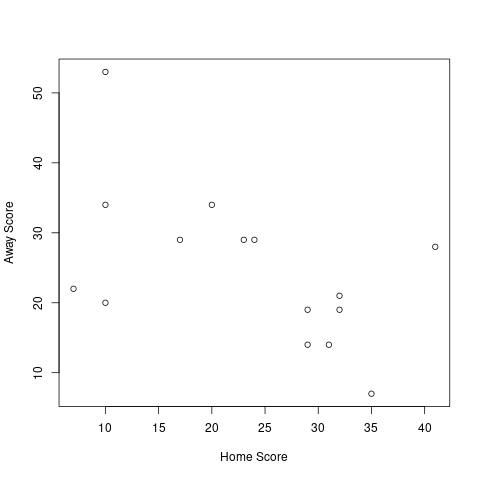

In [29]:
[rgraph|
plot(matches$Home_Score, matches$Away_Score, xlab = "Home Score", ylab = "Away Score")
|]

<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAeAAAAHgCAMAAABKCk6nAAAC7lBMVEUAAAABAQECAgIDAwMEBAQFBQUGBgYHBwcICAgJCQkKCgoLCwsMDAwNDQ0ODg4PDw8QEBARERESEhITExMUFBQVFRUWFhYXFxcYGBgZGRkaGhobGxscHBwdHR0eHh4fHx8gICAhISEiIiIjIyMkJCQlJSUmJiYnJycoKCgpKSkqKiorKyssLCwtLS0uLi4vLy8wMDAxMTEyMjIzMzM0NDQ1NTU2NjY3Nzc4ODg5OTk6Ojo7Ozs8PDw9PT0+Pj4/Pz9AQEBBQUFCQkJDQ0NERERFRUVGRkZHR0dISEhJSUlKSkpLS0tMTExNTU1OTk5PT09QUFBRUVFSUlJTU1NUVFRVVVVWVlZXV1dYWFhZWVlaWlpbW1tcXFxdXV1eXl5fX19gYGBhYWFiYmJjY2NkZGRlZWVmZmZnZ2doaGhpaWlqampra2tsbGxtbW1vb29wcHBxcXFycnJzc3N0dHR1dXV2dnZ3d3d4eHh5eXl6enp7e3t8fHx9fX1+fn5/f3+AgICBgYGCgoKEhISFhYWGhoaHh4eIiIiJiYmKioqLi4uMjIyNjY2Ojo6Pj4+QkJCRkZGSkpKTk5OUlJSVlZWWlpaXl5eYmJiZmZmampqbm5ucnJydnZ2fn5+goKCioqKjo6OkpKSlpaWmpqanp6eoqKipqamqqqqrq6usrKytra2urq6vr6+wsLCxsbGysrKzs7O0tLS1tbW2tra3t7e4uLi5ubm6urq7u7u8vLy9vb2+vr6/v7/AwMDBwcHCwsLDw8PExMTFxcXGxsbHx8fIyMjJycnKysrLy8vMzMzNzc3Ozs7Pz8/Q0NDS0tLT09PU1NTV1dXW1tbX19fY2Nja2trb29vc3Nzd3d3e3t7f39/g4ODh4eHi4uLj4+Pk5OTl5eXm5ubn5+fo6Ojp6enq6urr6+vs7Ozt7e3u7u7v7+/w8PDx8fHy8vLz8/P09PT19fX29vb39/f4+Pj5+fn6+vr7+/v8/Pz9/f3+/v7///+BcKj7AAAP7klEQVR4nO3dfXxWdd3A8d9g4BwbDBm4uHkwA4RCmUI5dZomlKTdqXkLcZtkUlYmKqKVZvYkJQlkVtYt5V35GJCm3JJgghimCK2kZuLzMJ4GyNOA73/3uc52Xdt1ds1r322/a9f58vn8sZ3X75yd89t5v7h27bx47eeETOe6ewLkN4CNB7DxADYewMYD2HgAGw9g4wFsPICNB7DxADYewMYD2HgAGw9g4wFsPICNB7DxADYewMYD2HgAGy9uwJt6umkd+sJtmxvSByqccwXDrqyPHPfsiMKfdWxq+VncgO90rnRPR76w0j2XPlDhRlQOdu7SyHGfdh9e1cG55WVxAz7D9XGLO/KFGYCflEPzXNHB9OFz3KKOzi0vixnwGz1Kv+kuCTbe+fKAqp+7i5o36lz56vEPysufLB80fXuL/Y9XlR418YXA17nmvYkSwPKyc1ubBhtPkDjuFtk9e1TJhF9L01itO2Zmv+ELVp9UctbG1AmDXYs+UPqJTcGL/4zh/SaulbST508xA57vpvzd9d0r8nk35MReCcDkRp0rGeoe3FHR64JqN/lganjjkb0mVrn3ytLh7ruvpfYmCoHvcP2Sg40nWDrOzaoJ/hkPPbfY/bTppLXOFX/Aud7HlbqLUyesc4VHVBa6GXKoyp1QXVC+Ke3k+VPMgE9x98px7vfyUkHxVjkvAExt1Dn31bcabndXiZzqHk4Nr5w6X7b2ctvCl+jk3vBUFe64CcOcuy452HiCwHaxrHRD62WJG9h00lpX8C+pDl44lrnRqRMGu56We9wJ8kc38oBMK7w77eT5U7yAXynoXS83uM/IQ26SyMIAMLVR547YJfJZFzYnNSxrZp5e5tzmEDi5NzxX4l20G3z1nuRg4wlC4B+7L4vs6+PebByrdcNEprq7ZYMbkTphnesv8mIwMN9dFp4v7eT5U7yAb2u8if323ePOFfltAJjaCH4mBgfMcFfeG/RCaviPPYbesXZAE3Byb3iu8CW6xZc0niAEvsNdGWwNdq82jgU/gxPAvwyBkycMdyUG5rpZaefpjvvyLsULeELwq01lZR/3yPOudIf8VwCY2mi0mOeuF7nrunWp4ZnuG8ExIfCfU3vDcyWBk4MtgJ9yw3bKCjdAMgAnT5gCftSNa5BLS+5JO3n+FCvgl1zh5uDTV9x0Od0de3JB4iU4udFoUT+wx3//p3vfrtTwPNd3cnGBe0M+6T6+PrU3URI4OdgCWCa5957fx92ZCTh5whTwwUo37syC92xOO3n+FCvgW93ZiU/LXdn+f3+q7MQfJYCTG00+/5jc/+hL32ge3jOtdMyvxrlb5cnxJY+l9iZKAicHWwK/c+3IkvH3SCbg5AlTwPL2pf/Rb/LfJO3k+VOsgJvbsvgxkR+6q5s32th/2BdT4Lf7uK/fXtFjVfNGG/sP+2IKLKs/0r/vKQ+33Ghj/+FeXIGpnQFsPICNB7DxADYewMYD2HgAGw9g4wFsPICNB7DxADYewMYD2HgAGw9g4wFsPICNB7DxzADvfeD+XPWH7v5eNZkBXl95ba4a1t3fqyY7wBcsz1WV3f29agIY4HgEcOYABjgeAZw5gAGORwBnDmCA4xHAmQMY4HgEcOYABjjRlnz760CtAjhz2YHP2yO1H3Q9J9flYDadCODMZQd2u+Tsma+8OfuiHMymEwGcuXYBlzWIHBiUg9l0IoAz1w7gl+Skl0ReHJmD2XQigDOXHfiMISVlH5eVg36Ug9l0IoAz15530XteXCPP5PtKBgBnrt2/B29b6nManQ/gzLUb+Omi1OaDE8Mm3OplRh0M4Mx14knWfXd23TQ6H8CZax/wjkMZBgGOQ9mBd3931BGucOS39kV3AByHsgNfdv6qrQ1bV0+5PLoD4DiUHbh8d/jpQKv/zw9wHMoOfGLjb8DLT4ruADgOZQf+89Djp8yYWjnk+egOgONQO95FH1j2P9//+RMHWo0DHIf4PRjgtgI4DgEMcFsBHIcABritAI5DAAPcVgDHIYABbiuA4xDAALcVwHGo64BX5OxPCd6/PcNsAM5c1wFPyNmfEjzjkQyzAThzXQd8Zs5u8BUAtz+A9QHsOYAVAawPYM8BrAhgfQB7DmBFAOsD2HMAKwJYH8CeA1gRwPoA9hzAigDWB7DnAFYEsD6APQewIoD1Aew5gBUBrA9gzwGsCGB9AHsOYEUA6wPYcwArAlgfwJ4DWBHA+gD2HMCKANYHsOcAVgSwPoA9B7AigPWZBF7degjgONRe4JLWQwDHoezAM4sSuaKi6A6A41B24He+cNr6urriulZLvAMch9rzEr1k7CO8RLfIHLC8dc4VADdnD1gO/fiS1oMAx6GOLBBd2/gHBa+Zk3YAwHlZRxaIfn5O2LRb0g4AOC/jSZY+g8DtWSAa4Lys6xaIBjgv67oFogHOy7pugWiA87KuWyAa4Lys6xaIBjgv67oFogHOy/g9WB/AngNYEcD6APYcwIoA1gew5wBWBLA+gD0HsCKA9QHsOYAVAawPYM8BrAhgfQB7DmBFAOsD2HMAKwJYH8CeA1gRwPoA9hzAigDWB7DnAFYEsD6APQewIoD1Aew5gBUBrA9gzwGsCGB9AHsOYEUA6wPYcwArAlgfwJ4DWBHA+gD2HMCKANYHsOcAVgSwPoA9B7AigPUB7DmAFQGsD2DPAawIYH0Aew5gRQDrMwnc0HoI4DiUHbju8jPven5kz9M3RncAHIeyA5974f1nDb73lavOi+4AOA5lBy7bJiuCb6l+QHQHwHEoO/DQF2XLE8ENHBHdAXAcyg5859Gzgo93jfl+dAfAcagd76JrlgQf5j7UahzgONSR9YObAjgOdWT94Acnhh1/TdoBAOdlPMnSZxCY9YNbZgyY9YOjGQNm/eBoxoBZPziaMWDW
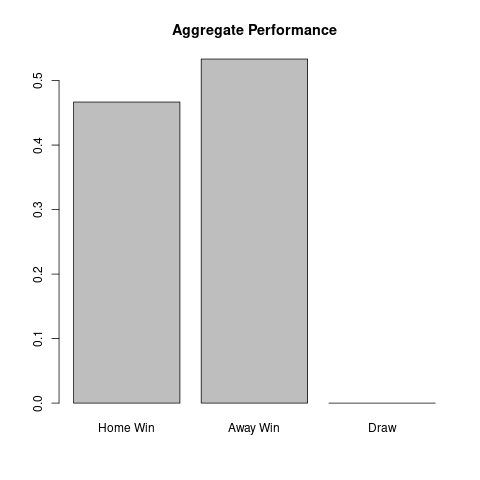

In [32]:
[rgraph|
means <- c(mean(matches$Home_Win), mean(matches$Away_Win), mean(matches$Draw))
categories <- c("Home Win", "Away Win", "Draw")
barplot(means, names.arg = categories, main = "Aggregate Performance")
|]

In [37]:
[rprint|
c(mean(matches$Diff), median(matches$Diff), sd(matches$Diff))
|]

[1] 15.733333 13.000000  9.617444

<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAeAAAAHgCAIAAADytinCAAAgAElEQVR4nO3deUBU5cIG8HeYAYZlgNHBgRAUlEXCHVDUQswlUQREQ9S8kGviNdDPq6bimlmWlYWoVyy3ItcANUkDJRXZFGWJVGSVzQGEQXZmvj+mi4ijpsg578Dz+2vmcM77PojzeHzncIYjl8sJAADQR43tAAAAoBwKGgCAUihoAABKoaABACiFggYAoBQKGgCAUihoAABKoaABACiFggYAoBQKGgCAUihoAABKoaABACiFggYAoBQKGgCAUihoAABKoaABACiFggYAoBQKGgCAUihoAABKoaABACiFggYAoBQKGgCAUihoAABKoaABACiFggYAoBQKGgCAUihoAABKoaABACiFggYAoBQKGgCAUihoAABKoaABACiFggYAoBQKGgCAUihoAABKoaABACiFggYAoBQKGgCAUihoAABKoaABACiFggYAoBQKGgCAUihoAABKoaABACiFggYAoBQKGgCAUihoAABKoaABACiFggYAoBQKGgCAUihoAABKoaABACiFggYAoBQKGgCAUihoAABKoaABACiFggYAoBSP7QAvRyKRxMTEsJ0CAOBvampqU6ZMUVdX74jBVaygo6Ojw8PDnZ2d2Q4CAEAIIQcPHhw0aFCfPn06YnAVK2hCyMiRIxcsWMB2CgAAQghJSEjouMGxBg0AQCkUNAAApVDQAACUQkEDAFCK6YKWSqVyuZzhSQEAVBETBV1bW7t161Zra2s+n6+np6ehoWFlZbVp06aGhgYGZgcAUFFMFLS/v39iYuL+/fuLiooaGxtLS0sPHDiQkZGxePFiBmYHAFBRTFwHHRkZmZeXp6WlpXgqFAqdnJwcHR0tLCwYmB0AQEUxcQZtamoaFRXVZmNsbKxIJGJgdgAAFcXEGXRISMj06dODgoJsbW0FAkF1dXVmZqZEIgkPD2dgdgAAFcVEQQ8bNiw7OzsmJiY3N7esrEwoFM6fP9/Z2ZnL5T7nqISEhKfvixQXF2diYtKRYQEAaMHQvTi4XO7YsWMVj8vLyzU1NZ/fzoQQY2PjoUOHttmYkJBQWFjYIREBACjDREG7ubkdO3aMz+dnZWX5+PgkJiZyudzx48d///33YrH4WUeZmpqampq22XjmzJmioqIOzgsAQAUm3iQ8ffp0c3MzIWThwoUjRozIzc3Nz8+3s7NbsmQJA7MDAKgoRm83mpycfO7cOR6PRwj59NNP33jjDSZnBwBQLQz9qndJSQkhxMLCIi8vT7Hlzp07+vr6zMwOAKCKmCjot99+29nZWSAQ3Lt379///jch5PLly87OzorHAACgFBNLHJcuXSKE1NXV5eTkVFVVEUJ4PN6ePXs8PDwYmB0AQEUxtwbN5/NtbGwUj4cPH87YvAAAKgr3gwYAoBQKGgCAUihoAABKoaABACiFggYAoBQKGgCAUihoAABKoaABACiFggYAoBQKGgCAUihoAABKoaABACiFggYAoBQKGgCAUihoAABKoaABACiFggYAoBQKGgCAUihoAABKoaABACiFggYAoBQKGgCAUihoAABKoaABACiFggYAoBQKGgCAUihoAABKoaABACiFggYAoBQKGqDTam5uvnv3bl5eHttB4BXx2A4AAB0iIyNj0aJF1tbWtbW1ZWVlBw8eNDQ0ZDsUvBwUNEDn5O/vf+TIEVNTU0JIfHx8YGDg4cOH2Q4FLwdLHACdkEQiEYlEinYmhAwbNuz+/fvsRoJXgIIG6IS0tbVramrYTgHthYIG6IS0tbUNDAxOnjxJCJHJZJ9//vno0aPZDgUvDQUN0Dnt3r378uXLLi4uY8aMkclka9asYTsRvDS8SQjQOQkEgh07drCdAtoFZ9AAAJRCQQMAUAoFDQBAKRQ0AAClUNAAAJRCQQMAUIrpgpZKpXK5nOFJAQBUERMFXVtbu3XrVmtraz6fr6enp6GhYWVltWnTpoaGBgZmBwBQUUwUtL+/f2Ji4v79+4uKihobG0tLSw8cOJCRkbF48WIGZgcAUFFM/CZhZGRkXl6elpaW4qlQKHRycnJ0dLSwsGBgdgAAFcXEGbSpqWlUVFSbjbGxsSKRiIHZAQBUFBNn0CEhIdOnTw8KCrK1tRUIBNXV1ZmZmRKJJDw8nIHZAQBUFBMFPWzYsOzs7JiYmNzc3LKyMqFQOH/+fGdnZy6Xy8DsAAAqiqG72XG53LFjx7Y8jYuLe2E7nzhxYvfu3W023r59u2/fvq8/HwAAfdi53ej48eOlUunz9/Hy8vLy8mqzMTAwsKioqMNyAQBQhIk3CQMCArSeVF1drXjAwOwAACqKiTPorVu31tbWpqenh4SE9OjRgxBiYWFx7949BqYGAFBdTJxBa2tr79mz5z//+c/MmTOTkpLEYrGamppYLBaLxQzMDgCgophbg54yZYqjo6Ofn19kZCRjkwIAqC5Gb5ZkZGR09uzZ/v37e3h4MDkvAIAqYvpudhwOx9/f/9ChQwzPCwCgcnA/aAAASqGgAQAohYIGAKAUChoAgFIoaAAASqGgAQAohYIGAKAUChoAgFIoaAAASqGgAQAohYIGAKAUChoAgFIoaAAASqGgAQAohYIGAKBUVyzokpISuVzOdgoAgBdQ1YI+fvy4tbW1WCz28/Orq6tTbHR2dub8j5ubGyGktrZ26dKlI0aM2LFjh2IfiUTi6+vL4XCeHtPQ0JDH46mrq6urq5ubm+/du/dZs8fHxzs4ODwn3qRJk9psEQqFisG1tbWdnJwuXrz49FBbt241MzMrKSmJiIiwsLA4e/bsP/mjAIBOS65SAgICvL2909PTBQJBSkpKbW2tl5fX6tWrFV/t2bNnVlZWdXV1dXV1bW2tXC7fuHHj6tWrCwsLJ06ceP78eblcvnz58osXLyodXCQSJSUlyeXyurq6I0eOqKmppaenK92zsrIyPj7+OTl5PF6bLQYGBmlpaXK5XCqVHj58WF9f//r1622GEovFxcXFcrnc3d39xIkTL/zTqKure+E+ANCh5s6de/fu3Q4aXCXPoM+ePTt27NiBAwfy+fxly5b9+OOPhJC6urqHDx9aWFjo6Ojo6Ojw+XxCyMOHD/v06WNsbGxiYlJeXl5YWHj37l1nZ+fnj6+pqTlz5sxevXrdunWL/O9s3dDQ0MvLSyKREELu3Lnj7+9PCElPTx81atSsWbPEYrGTk1NMTAwhZMqUKU1NTf37929oaHh6cF1d3VmzZi1ZsuSzzz5rPdScOXMkEomLi8uKFSuio6MDAwPPnTtHCLl06dKgQYOMjY29vb3Ly8sJITdv3nRxcVm7du3IkSOV7qA0FSEkLCzM0tLSyMho0aJFiv92PH0sANBDJQu6oaFB/r9FZHV19fz8/Obm5pycHB6PZ29vLxQKx40bd+/ePULIypUrDx8+bGFh0dzc7OXl9cknn6xZs+aF4zc2Nh47diwnJ8fGxiYrK2vBggWHDx++f/++SCT66KOP2ux85coVR0fH4uJiV1fXoKAgQkhERASPx0tNTdXQ0HjWFBMmTLh+/XrrLQcPHhQKhXFxcdu3b3d2dt61a9e7775bVlbm4eHx3XffFRQUmJmZ+fr6KnZOTEzU19ePi4t71g5Pp/rzzz8DAgIiIyNv3bp18+bN4ODgZx0LALTooDPzDqJY4khOTtbV1U1ISCgrK5s6dSohpLy8PD4+3tXV9e7duw0NDUuXLnVwcGhzbHZ29nvvvfecwUUikYaGBp/P5/F4YrF4586dcrn8iy++mDt3rmKHkpISTU1NmUyWlJRkb28vl8vT0tI0NDSkUqlcLk9PT7ezs1Ps+ZwlDoXMzExdXV25XN4ylCLAw4cP5XL55MmTT58+LZfLQ0NDx40bp/hqQUGBmppaVVVVSkqKUChsbm5+1g5KU23YsGHZsmWKPdPT069cuaL02H/wQwCAxzp0iYPH9j8Qr2LI
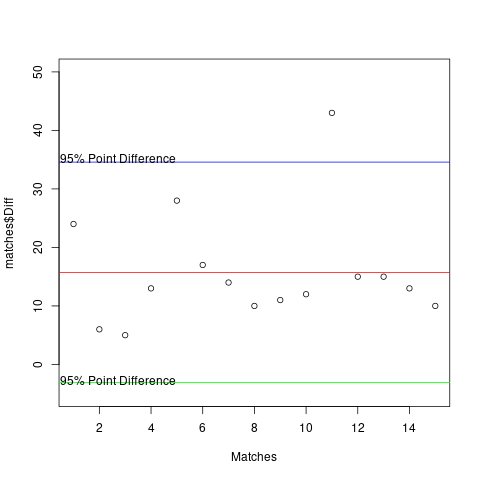

In [51]:
[rgraph|
plot(matches$Match, matches$Diff, ylim=c(-5,50), xlab = "Matches")
abline(h = mean(matches$Diff), col = "red")
abline(h = mean(matches$Diff)+1.96*sd(matches$Diff), col = "blue")
text(x = 2, y = mean(matches$Diff)+1.96*sd(matches$Diff)+0.5, "Upper 95% Point Difference")
abline(h = mean(matches$Diff)-1.96*sd(matches$Diff), col = "green")
text(x = 2, y = mean(matches$Diff)-1.96*sd(matches$Diff)+0.5, "Lower 95% Point Difference")
|]